In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC



In [112]:
df = pd.read_csv("../data/heart_disease_selected.csv")

In [113]:
X = df.drop(columns=["target"])
y = df["target"]

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [115]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import pandas as pd

# ✅ 1. Evaluation Function (no ROC curve here)
def evaluate_model(model_name, y_test, y_pred, y_prob):
    """
    Evaluate classification model and return metrics + FPR/TPR for ROC plotting.
    """
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    mse = mean_squared_error(y_test, y_pred)

    print(f"{model_name} Performance:")
    print(f"Accuracy  : {acc*100:.2f}%")
    print(f"Precision : {prec:.4f}")
    print(f"Recall    : {rec:.4f}")
    print(f"F1-Score  : {f1:.4f}")
    print(f"AUC Score : {auc:.4f}")
    print("MSE:", mse)

    # Get ROC data
    fpr, tpr, _ = roc_curve(y_test, y_prob)

    # Return both metrics and ROC data
    return {
        "Model": model_name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1,
        "AUC": auc,
        "FPR": fpr,
        "TPR": tpr,
        "MSE" : mse
    }


In [116]:

log_model = LogisticRegression()
log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)
y_prob = log_model.predict_proba(X_test)[:, 1]

log_results = evaluate_model("Logistic Regression", y_test, y_pred, y_prob)


Logistic Regression Performance:
Accuracy  : 86.89%
Precision : 0.8333
Recall    : 0.8929
F1-Score  : 0.8621
AUC Score : 0.9578
MSE: 0.13114754098360656


In [117]:

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)
y_prob = dt_model.predict_proba(X_test)[:, 1]

dt_results = evaluate_model("Decision Tree", y_test, y_pred, y_prob)


Decision Tree Performance:
Accuracy  : 77.05%
Precision : 0.6944
Recall    : 0.8929
F1-Score  : 0.7812
AUC Score : 0.7798
MSE: 0.22950819672131148


In [118]:

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]

rf_results = evaluate_model("Random Forest", y_test, y_pred, y_prob)


Random Forest Performance:
Accuracy  : 88.52%
Precision : 0.8621
Recall    : 0.8929
F1-Score  : 0.8772
AUC Score : 0.9410
MSE: 0.11475409836065574


In [119]:

svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
y_prob = svm_model.predict_proba(X_test)[:, 1]

svm_results = evaluate_model("SVM", y_test, y_pred, y_prob)


SVM Performance:
Accuracy  : 91.80%
Precision : 0.8710
Recall    : 0.9643
F1-Score  : 0.9153
AUC Score : 0.9654
MSE: 0.08196721311475409


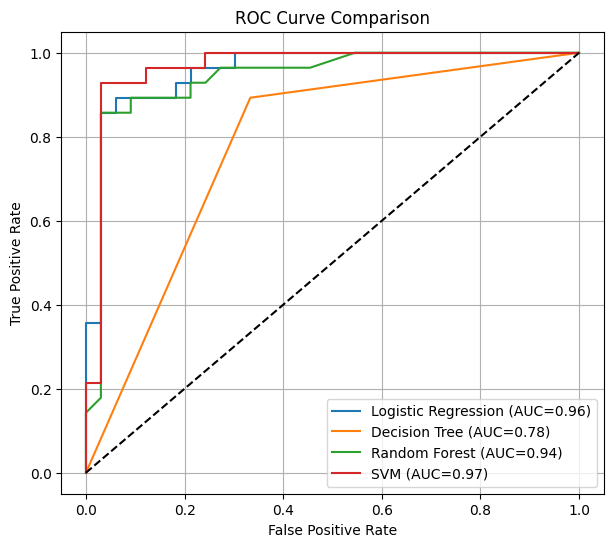

In [120]:
# Plot combined ROC Curve
plt.figure(figsize=(7, 6))

for result in [log_results, dt_results, rf_results, svm_results]:
    plt.plot(result["FPR"], result["TPR"], label=f"{result['Model']} (AUC={result['AUC']:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()
